In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\HDIT_03\Downloads\PYTHON\Data portfolio\Global Indicator\Global Economy Indicators.csv')
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [5]:
pd.DataFrame(df.dtypes, columns = ['Data Type'])

,Data Type
CountryID,int64
Country,object
Year,int64
AMA exchange rate,float64
IMF based exchange rate,float64
Population,int64
Currency,object
Per capita GNI,int64
"Agriculture, hunting, forestry, fishing (ISIC A-B)",float64
Changes in inventories,float64


In [7]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.strip()

In [9]:
null_df = pd.DataFrame(df.isnull().sum(), columns = ['Count of Null Values'])
null_df.index.name = 'Column Name'
null_df[null_df['Count of Null Values'] > 0].sort_values('Count of Null Values', ascending = False)


,Count of Null Values
Column Name,
changes in inventories,1841
"agriculture, hunting, forestry, fishing (isic a-b)",121
general government final consumption expenditure,52
gross capital formation,52
gross fixed capital formation (including acquisitions less disposals of valuables),52
household consumption expenditure (including non-profit institutions serving households),52
"transport, storage and communication (isic i)",49
"wholesale, retail trade, restaurants and hotels (isic g-h)",49
manufacturing (isic d),43


## Plotting the Global and Vietnam Population from 1970-2021

#### How many country in the W in 2021

In [28]:
df.country.nunique()

220

In [12]:
# Number of countries increased from 187 to 2020 since 1970
pd.DataFrame(df.year.value_counts())

,count
year,
1990,216
2008,214
2009,214
2010,214
2012,213
2011,213
2005,212
2006,212
2007,212


### Global Population in 2021

In [13]:
df1 = df[['country', 'year', 'population']]
df_2021 = df1[df1.year == 2021]
world_population_2021 = df_2021.population.sum()
world_population_2021

7883331967

Text(0.5, 1.0, 'Global Population Since 1970')

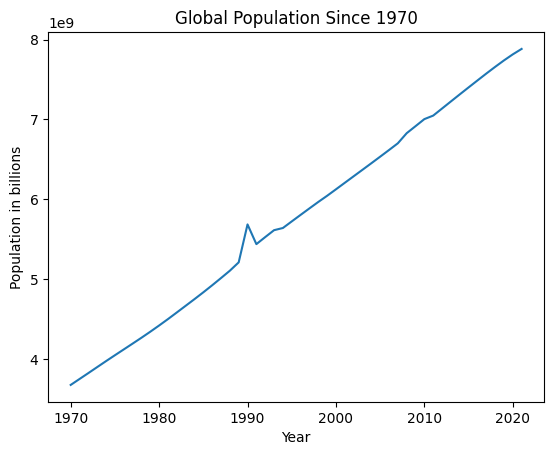

In [16]:
df1.groupby(['year']).population.sum().sort_index().plot()
plt.ylabel('Population in billions')
plt.xlabel('Year')
plt.title('Global Population Since 1970')

### Population in Vietnam 2021

Text(0.5, 1.0, 'VN Population Since 1970')

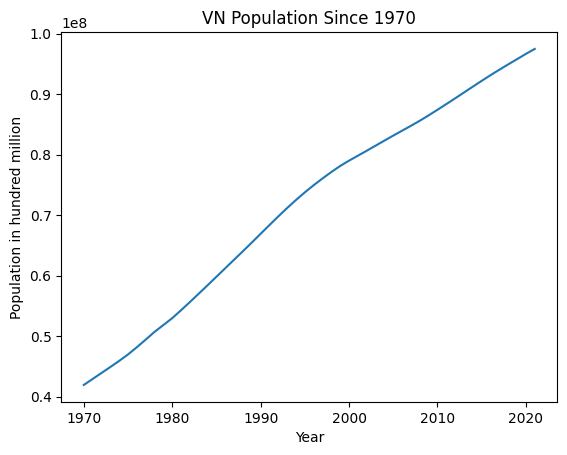

In [40]:
df1_vn = df1[df1.country == ' Viet Nam ']
df1_vn.groupby(['year']).population.sum().sort_index().plot()
plt.ylabel('Population in hundred million')
plt.xlabel('Year')
plt.title('VN Population Since 1970')

### The countries with highest and lowest US exchange rate?

In [47]:
df2 = df[['country', 'year', 'imf based exchange rate']]
df2_2021 = df2[df2['year'] == 2021]
df2_2021_sorted_desc = df2_2021.sort_values('imf based exchange rate', ascending = False). head(15)
df2_2021_sorted_desc

Column Name,country,year,imf based exchange rate
4316,Iran (Islamic Republic of),2021,42000.000000
8729,Somalia,2021,24300.000000
8645,Viet Nam,2021,23159.782590
4264,Indonesia,2021,14308.143900
10280,Uzbekistan,2021,10609.464390
8509,Sierra Leone,2021,10439.425320
3848,Guinea,2021,9795.705833
5088,Lao People's DR,2021,9697.915789
7425,Paraguay,2021,6774.162735
1531,Cambodia,2021,4098.722795


Text(0.5, 1.0, 'Highest Exchange Rates in the World')

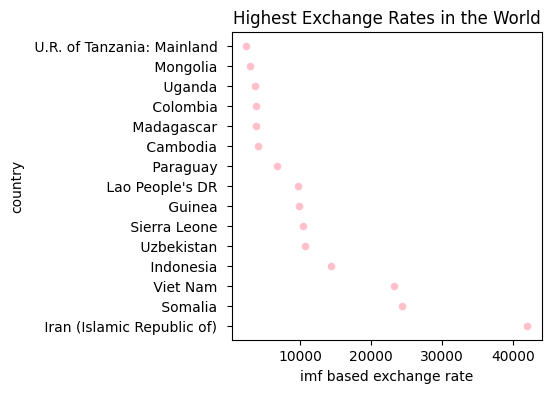

In [48]:
df2_2021_sorted_desc.plot(kind = 'scatter', x = 'imf based exchange rate', y = 'country', figsize = (4,4), c = 'pink')
plt.title('Highest Exchange Rates in the World')

In [50]:

df2_2021_sorted_asc = df2_2021.sort_values('imf based exchange rate', ascending = True). head(15)
df2_2021_sorted_asc

Column Name,country,year,imf based exchange rate
5004,Kuwait,2021,0.301643
603,Bahrain,2021,0.376000
6360,Oman,2021,0.384500
4764,Jordan,2021,0.710000
10008,United Kingdom,2021,0.727065
1739,Cayman Islands,2021,0.833330
5224,Latvia,2021,0.845494
2447,Cyprus,2021,0.845494
8677,Slovenia,2021,0.845494
8593,Slovakia,2021,0.845494


Text(0.5, 1.0, 'Lowest Exchange Rates in the World')

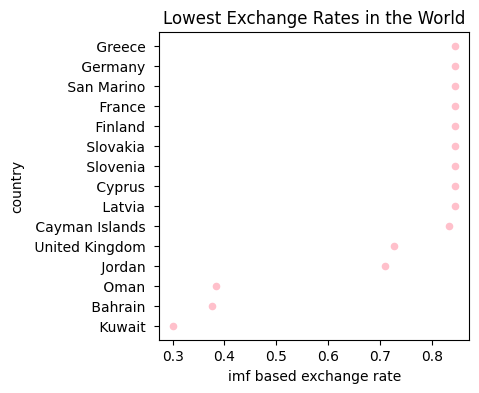

In [51]:
df2_2021_sorted_asc.plot(kind = 'scatter', x = 'imf based exchange rate', y = 'country', figsize = (4,4), c = 'pink')
plt.title('Lowest Exchange Rates in the World')

In [52]:
pd.DataFrame(df.country.value_counts())

,count
country,
Afghanistan,52
Kenya,52
Mozambique,52
Oman,52
Namibia,52
...,...
Yugoslavia (Former),21
Curaçao,17
Sint Maarten (Dutch part),17


In [54]:
pd.DataFrame(df['gross domestic product (gdp)']).describe()
# 20 trillion is max
#183 million is average

,gross domestic product (gdp)
count,1.051200e+04
mean,1.828765e+11
std,9.845997e+11
min,2.585174e+06
25%,1.439217e+09
50%,8.070572e+09
75%,5.172596e+10
max,2.330000e+13


### Plot global GDP since 1970

Text(0.5, 1.0, 'Global GDP since 1970')

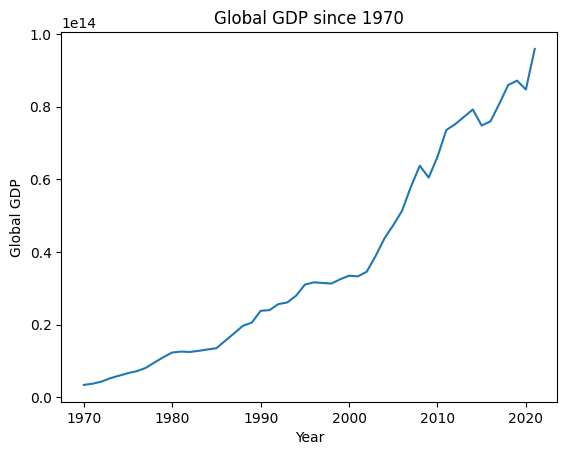

In [57]:
df3 = df.groupby(['year']).sum()
df3_gdp = df3['gross domestic product (gdp)']
df3_gdp.plot()

plt.ylabel('Global GDP')
plt.xlabel('Year')
plt.title('Global GDP since 1970')


Text(0.5, 1.0, 'Top 10 countries by GDP')

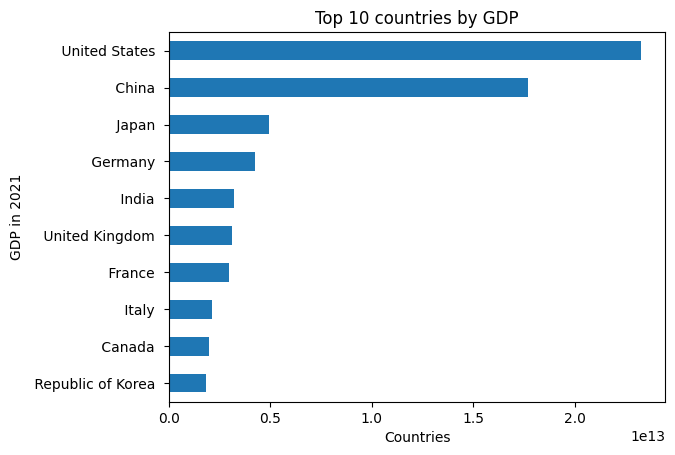

In [59]:
df3_2021 = df[df.year == 2021]
df3_country = df3_2021.groupby(['country']).sum()
df3_gdp_desc= df3_country['gross domestic product (gdp)'].sort_values().tail(10)
df3_gdp_desc.plot(kind = 'barh')

plt.ylabel('GDP in 2021')
plt.xlabel('Countries')
plt.title('Top 10 countries by GDP')

Text(0.5, 1.0, 'Top 10 countries by GDP per Capita')

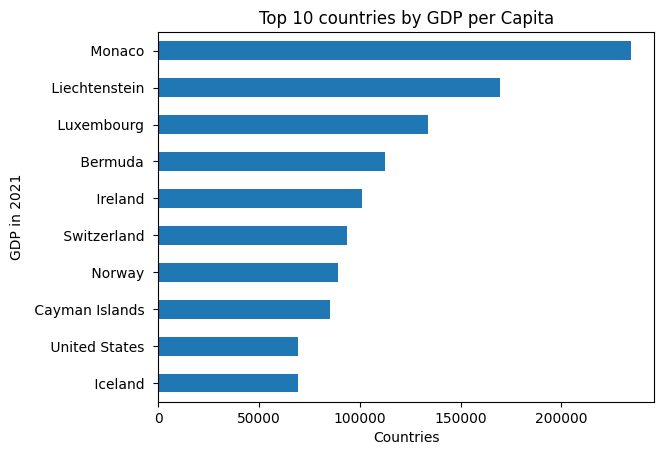

In [60]:
df['gdp per capita'] = df['gross domestic product (gdp)']/df['population']
df3_2021 = df[df.year == 2021]
df3_country = df3_2021.groupby(['country']).sum()
df3_gdp_desc= df3_country['gdp per capita'].sort_values().tail(10)
df3_gdp_desc.plot(kind = 'barh')

plt.ylabel('GDP in 2021')
plt.xlabel('Countries')
plt.title('Top 10 countries by GDP per Capita')

### Analyze import and export across countries

In [61]:
pd.DataFrame(df[['imports of goods and services', 'exports of goods and services']]).describe()

Column Name,imports of goods and services,exports of goods and services
count,1.047000e+04,1.049100e+04
mean,4.591504e+10,4.671176e+10
std,1.804351e+11,1.748857e+11
min,1.982159e+06,-1.669759e+09
25%,5.891469e+08,4.026725e+08
50%,2.891919e+09,2.407906e+09
75%,1.602312e+10,1.542492e+10
max,3.400000e+12,3.530000e+12


Text(0.5, 1.0, 'Top 10 net importers and exporters in 2021')

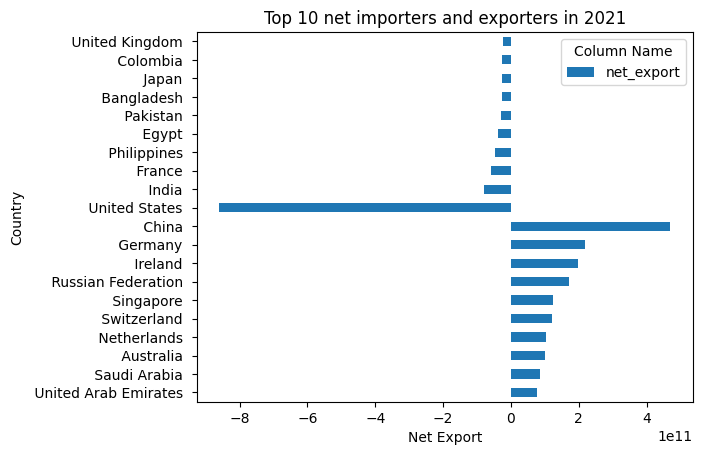

In [73]:
df['net_export'] = df['exports of goods and services'] - df['imports of goods and services']
df['net_import'] = df['imports of goods and services'] - df['exports of goods and services']

df4 = df[df.year == 2021]

df4_bot_net_ex = df4[['country', 'net_export']].sort_values('net_export', ascending = True).head(10)
df4_top_net_ex = df4[['country', 'net_export']].sort_values('net_export', ascending = True).tail(10)

df_net_combined = pd.concat([df4_top_net_ex, df4_bot_net_ex])
df_net_combined.plot(kind = 'barh', x = 'country')
plt.ylabel('Country')
plt.xlabel('Net Export')
plt.title('Top 10 net importers and exporters in 2021')

Text(0.5, 1.0, 'Top 10 importers and exporters in 2021')

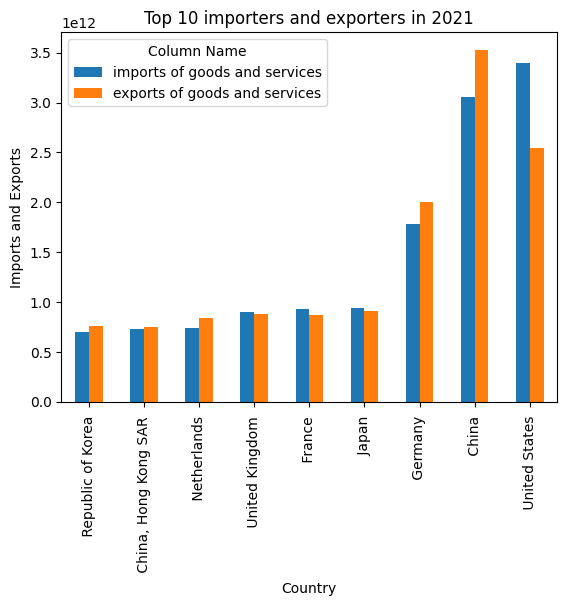

In [74]:
df4_imp = df4[['country', 'imports of goods and services']].sort_values('imports of goods and services').tail(10)
df4_exp = df4[['country', 'exports of goods and services']].sort_values('exports of goods and services').tail(10)
merged_df = pd.merge(df4_imp,df4_exp, on = 'country')
merged_df.plot(kind='bar', x='country')

plt.xlabel('Country')
plt.ylabel('Imports and Exports')
plt.title('Top 10 importers and exporters in 2021')

Text(0.5, 1.0, 'Twice as many countries had trade deficits')

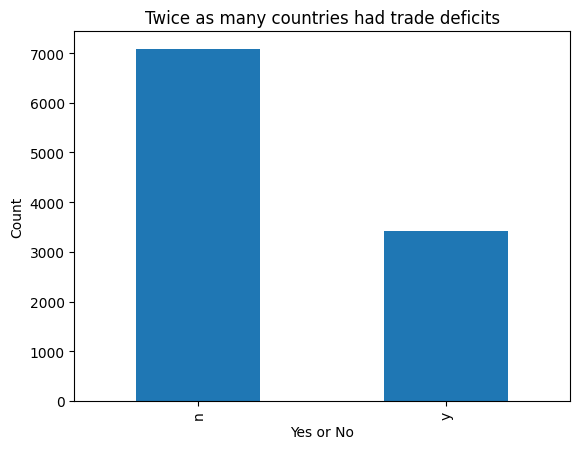

In [76]:
df['net_export_str'] =df['net_export'].apply(lambda x: 'y' if x> 0 else 'n')

df_groupby_net_import_str = df[ 'net_export_str'].value_counts()
df_groupby_net_import_str.plot(kind='bar');
plt.ylabel('Count')
plt.xlabel('Yes or No')
plt.title('Twice as many countries had trade deficits')

Text(0.5, 1.0, 'Count of countries importing and exporting since 1970')

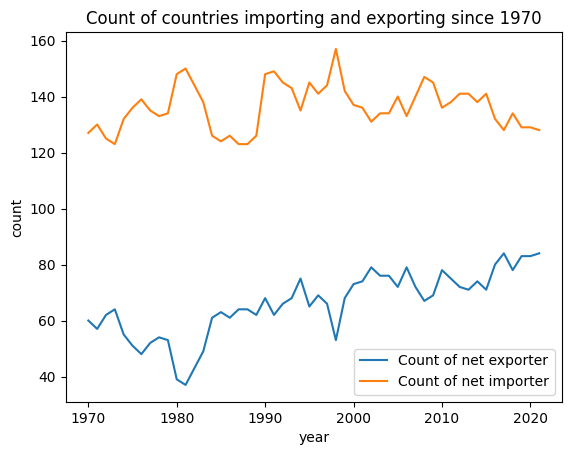

In [78]:
df_y = df[df.net_export_str == 'y']
df_n = df[df.net_export_str == 'n']

df_groupby_year_y = df_y[['year', 'net_export_str']].groupby('year').value_counts()
df_groupby_year_n = df_n[['year', 'net_export_str']].groupby('year').value_counts()

merge_y_n = pd.merge(df_groupby_year_y, df_groupby_year_n, on = 'year')
merge_y_n.plot()

plt.xlabel('year')
plt.ylabel('count')
plt.legend(['Count of net exporter', 'Count of net importer'])
plt.title('Count of countries importing and exporting since 1970')